# Лабораторная работа №3 «Цифровой спектральный анализ детерминированных сигналов»



In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot

from scipy import signal
import scipy.io.wavfile

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import get_window
from pathlib import Path as _Path
from IPython.display import Audio as _Audio
import scipy.fft as fft
import scipy.signal as signal

In [2]:
# Если используете Google Colab, то установите backend inline
#%matplotlib notebook

In [3]:
# Если используете Jupyter, то установите backend notebook
%matplotlib widget

# Variant 11


# Занятие 1. ДПФ и спектральный анализ.

## Задача 1.1.  Частотная ось ДПФ.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello1.wav' | 'cello2.wav' | 'glockenspiel.wav' | 'vibraphone1.wav' | 'clarinet.wav' | 'guitar.wav' |

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello3.wav' | 'cello4.wav' | 'tuning-fork.wav' | 'vibraphone2.wav' | 'flute.wav' | 'wine-glass.wav' |




Считайте отсчеты дискретного сигнала $x[k]$, содержащегося в аудиофайле Вашего варианта. 

1) Выберите $y[k]$ — часть информативной области сигнала $x[k]$ длиной $2^{14}$ отсчетов. Если в файле меньше $2^{14}$ отсчетов, дополните ее нулями до этого числа отчетов справа.  

2) Постройте с помощью алгоритма БПФ один период ДВПФ сигнала $y[k]$. Укажите расстояние между точками по оси частот. Ось частот приведите в Гц. Определите по графику частоты основных гармонических компонент. 

3) выведите график сигнала $y[k]$ в области, где наблюдается колебание. По графику оцените период этого колебания $T_0$. Сравните частоту $f_0=1/ T_0$ с частотами основных гармоник из п.2.



Частота дискретизации 44100 Гц
Тип данных int16
Размер массива (958464,)
Число отсчетов записи 958464


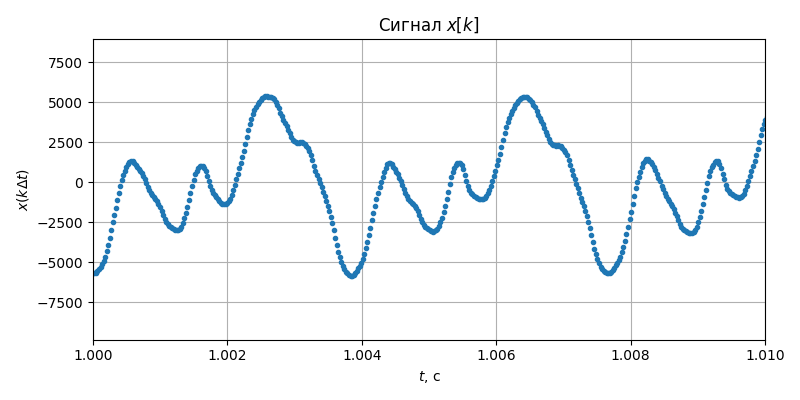

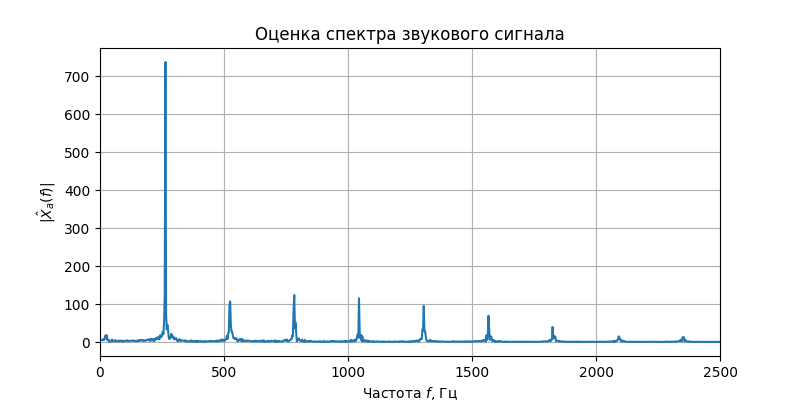

f = 263 Hz, 526 Hz, 789 Hz


In [4]:
# 2^14 = 16384
import scipy.fft
Nv = 2

fs, x = scipy.io.wavfile.read('dataset_lab3_/cello2.wav')
print("Частота дискретизации %.0f Гц" %fs)
print("Тип данных", x.dtype)
print("Размер массива", x.shape)
print("Число отсчетов записи", x.shape[0])

plt.figure(figsize=[8, 4]) # размер полотна
plt.plot(np.arange(x.size)/fs, x, '.') # график сигнала (точками)
plt.grid() # сетка 
plt.xlim([1, 1.01]) # Выделение фраграмента от 1 с до 1,07 с
plt.title("Cигнал $x[k]$") # заголовок графика
plt.xlabel("$t$, c") # подпись оси абсцисс
plt.ylabel("$x(k\Delta t)$") # подпись оси ординат
plt.tight_layout()
plt.show()

x = x[4 * fs: 4 * fs + 16384]

Nfft=max(scipy.fft.next_fast_len(x.size), 2**14) 
f, Xf = np.linspace(-0.5*fs, 0.5*fs, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(x/fs, Nfft))


plt.figure(figsize=[8, 4])
plt.title("Оценка спектра звукового сигнала")
plt.plot(f, abs(Xf), '-')
plt.xlim([0, 2500])
plt.grid()
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|\hat{X}_a(f)|$")
#plt.tight_layout()
plt.show()

print('f = 263 Hz, 526 Hz, 789 Hz')


In [5]:
t0 = (-(1.00387-1.00767))

print("T0 = ", t0)
print("f0 = ", 1 / t0)

T0 =  0.0038000000000000256
f0 =  263.1578947368403


## Задача 1.2. Задача распознавания спектральных компонент. 

Считайте последовательность $x[k]$ из файла Вашего варианта (`variant_Nv_ex_1_2.npy`, где `Nv` — номер варианта). Известно, что ее аналитическая запись  имеет вид 

$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$


где $N$ — длина последовательности, $M<(N-1)/2$, относительные частоты гармонических компонент совпадают с бинами ДПФ. Определите число компонент,  их амплитуды ${{A}_{m}}$ и фазы ${{\varphi }_{m}}$, $m=1,\dots, M$.


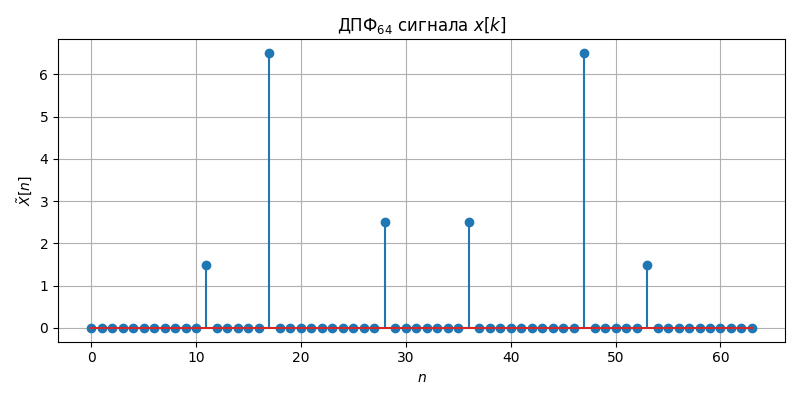

A_11 = 3.0000000000000027 phi_11 =  0.7853981633974402
A_17 = 13.000000000000007 phi_17 =  0.5235987755983025
A_28 = 5.000000000000007 phi_28 =  3.6651914291880923


In [6]:
Nv=2
x = np.load('dataset_lab3_/variant_%i_ex_1_2.npy' %Nv )
N = len(x)

Xn = np.fft.fft(x)/N

plt.figure(figsize=[8, 4])
plt.title("ДПФ$_{%i}$ сигнала $x[k]$" %N)
plt.stem(np.arange(Xn.size), abs(Xn))
plt.ylabel("$\\tilde{X}[n]$")
plt.xlabel("$n$")
plt.tight_layout()
plt.grid()
plt.show()

A_11 = 2 * np.abs(Xn[11])
phi_11 = np.angle(Xn[11])+(np.pi/2)
A_17 = 2 * np.abs(Xn[17])
phi_17 = np.angle(Xn[17])+(np.pi/2)
A_28 = 2 * np.abs(Xn[28])
phi_28 = np.angle(Xn[28])+(np.pi/2)

print("A_11 =", A_11, "phi_11 = ", phi_11)
print("A_17 =", A_17, "phi_17 = ", phi_17)
print("A_28 =", A_28, "phi_28 = ", phi_28)

# Занятие 2. Окна в спектральном анализе.

## Задача 2.1. Исследование характеристик различных окон.
Рассмотрите следующие окна для ДПФ длиной в $N=20+2N_v$, где $N_v $ — номер Вашего варианта:

1) прямоугольное (`boxcar`),

2) Бартлетта (`bartlett`),

3) Ханна (`hann`),

4) Хэмминга (`hamming`),

5) Блэкмана (`blackman`),

6) окно с плоской вершиной (`flattop`).

Постройте графики для окон во временной области, амплитудно-частотной характеристики окон в линейном масштабе и в дБ. По графикам для каждого окна оцените следующие параметры:

* ширину $\Delta \nu$ главного лепестка на уровне половинной мощности,

* максимальный уровень боковых лепестков относительно главного в дБ,

* асимптотическую скорость спада боковых лепестков в дБ/октава. 

Составьте таблицу с результатами. 


In [7]:
from scipy.signal import get_window

n = 20 + 2 * 2
k = np.arange(n)
nfft = 2 ** 18  

def plot_window_type(window_type):
    fig = plt.figure(figsize=[8, 3], dpi=100)
    fig.suptitle(f"Характеристики окна {window_type}")
    
    w = get_window(window_type, n)
    nu, w_f = np.linspace(-0.5, 0.5, num=nfft, endpoint=False), fft.fftshift(fft.fft(w, nfft))
    
    plt.subplot(1, 3, 1)
    plt.stem(k, w)
    plt.xlabel('$k$')
    plt.ylabel('$w[k]$')
    
    plt.subplot(1, 3, 2)
    plt.plot(nu, abs(w_f))
    plt.xlabel('$\\nu$')
    plt.ylabel('$|W(\\nu)|$')
    plt.grid()
    
    plt.subplot(1, 3, 3)
    with np.errstate(divide='ignore'):
        plt.plot(nu, 20 * np.log10(abs(w_f) / max(abs(w_f))))
    
    plt.grid()
    plt.xlabel('$\\nu$')
    plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
    
    plt.tight_layout()

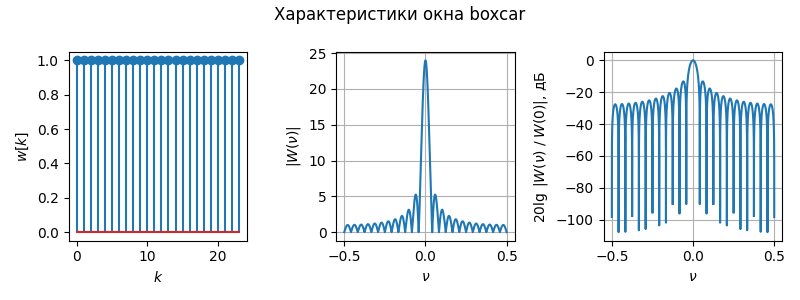

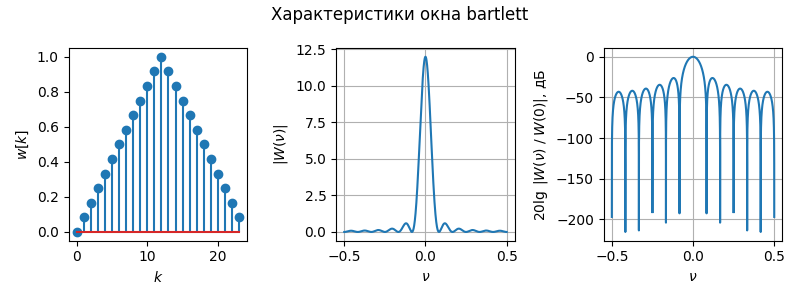

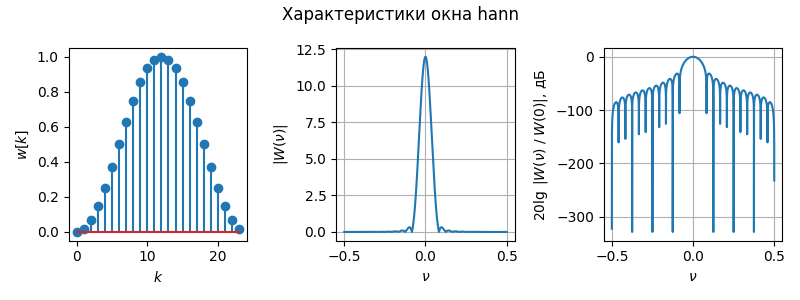

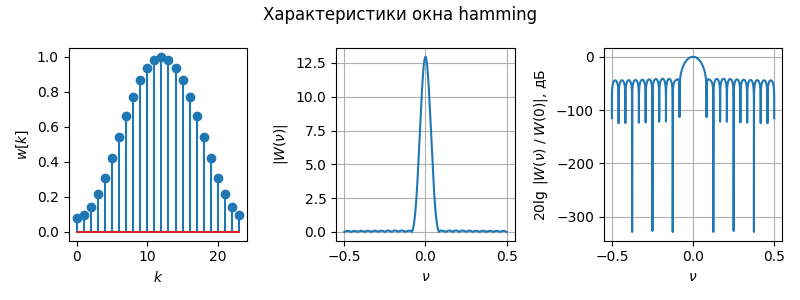

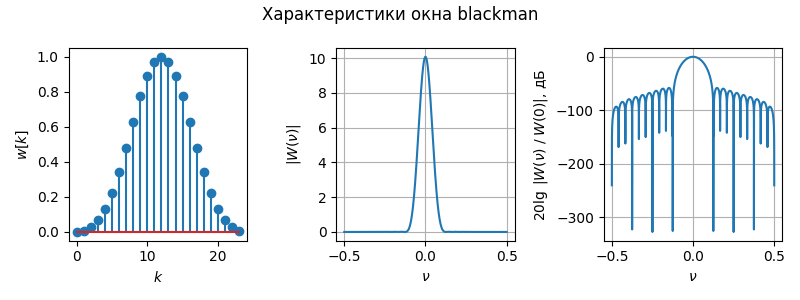

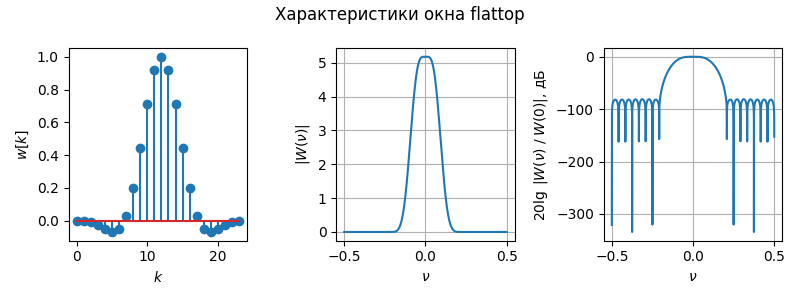

In [8]:
plot_window_type('boxcar')
plot_window_type('bartlett')
plot_window_type('hann')
plot_window_type('hamming')
plot_window_type('blackman')
plot_window_type('flattop')

$$\Delta \nu = 0.024 * 2 = 0.048 Hz$$

Максимальный уровень боковых лепестков: $$-13.8 dB$$

Скорость спада на боковых лепестках:
$$12.25 db/октава$$

## Задача 2.2. Окно Кайзера.
Повторите вычисления задачи 2.1 для окна Кайзера с параметром $\beta =0;\ \ 5;\ \ 6;\ \ 8,6$. Сравните полученные результаты с предыдущей задачей. 


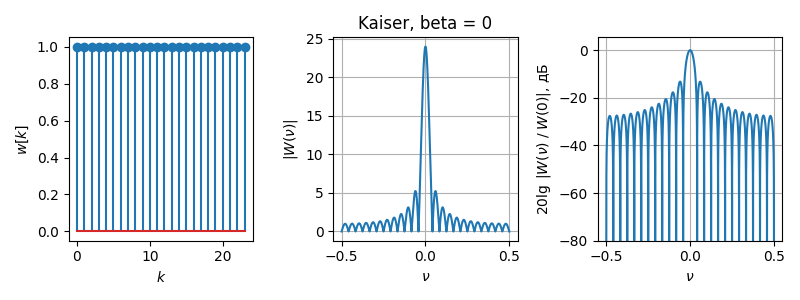

In [9]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

beta = 0
N = 20 + 2 * 2
#w = signal.get_window('blackman', N)
w = signal.get_window(('kaiser', beta), N)
# w = signal.get_window(5, N)
# w = signal.get_window(('chebwin', 13), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.title("Kaiser, beta = 0")
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-80)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

$$\Delta \nu = 0.028 * 2 = 0.056 Hz$$

Максимальный уровень боковых лепестков: $$-13 dB$$

Скорость спада на боковых лепестках:
$$5 db/октава$$

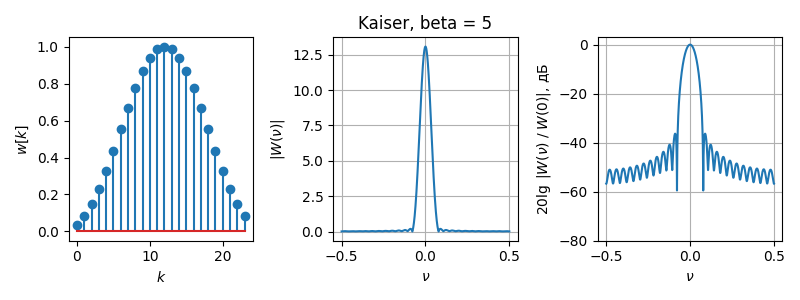

In [27]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

beta = 5
N = 20 + 2 * 2
#w = signal.get_window('blackman', N)
w = signal.get_window(('kaiser', beta), N)
# w = signal.get_window(5, N)
# w = signal.get_window(('chebwin', 13), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.title("Kaiser, beta = 5")
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-80)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

$$\Delta \nu = 0.039 * 2 = 0.078 Hz$$

Максимальный уровень боковых лепестков: $$-36 dB$$

Скорость спада на боковых лепестках:
$$10 db/октава$$

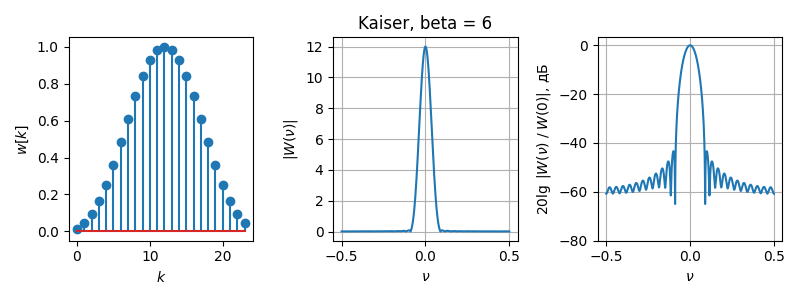

In [11]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

beta = 6
N = 20 + 2 * 2
#w = signal.get_window('blackman', N)
w = signal.get_window(('kaiser', beta), N)
# w = signal.get_window(5, N)
# w = signal.get_window(('chebwin', 13), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.title("Kaiser, beta = 6")
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-80)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

$$\Delta \nu = 0.039 * 2 = 0.78 Hz$$

Максимальный уровень боковых лепестков: $$-43 dB$$

Скорость спада на боковых лепестках:
$$10 db/октава$$

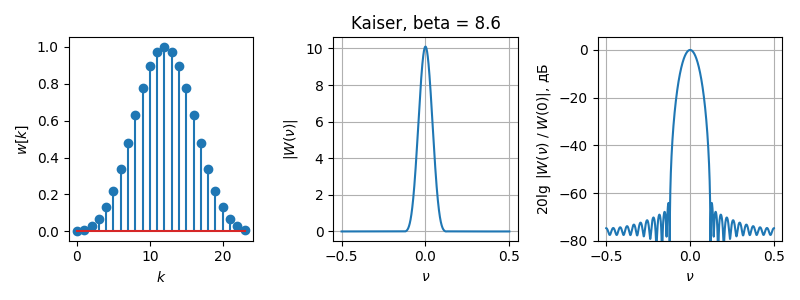

In [12]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

beta = 8.6
N = 20 + 2 * 2
#w = signal.get_window('blackman', N)
w = signal.get_window(('kaiser', beta), N)
# w = signal.get_window(5, N)
# w = signal.get_window(('chebwin', 13), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.title("Kaiser, beta = 8.6")
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-80)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

$$\Delta \nu = 0.118 * 2 = 0.236 Hz$$

Максимальный уровень боковых лепестков: $$-63 dB$$

Скорость спада на боковых лепестках:
$$10 db/октава$$


## Задача 2.3. Окно Чебышева.
Получите окно Чебышева для четырех уровней боковых лепестков, которые получились в задаче 2.2. Сравните ширину главного лепестка на уровне половинной мощности с результатами предыдущих задач. 


/home/denis/.local/lib/python3.10/site-packages/scipy/signal/windows/_windows.py:1543: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


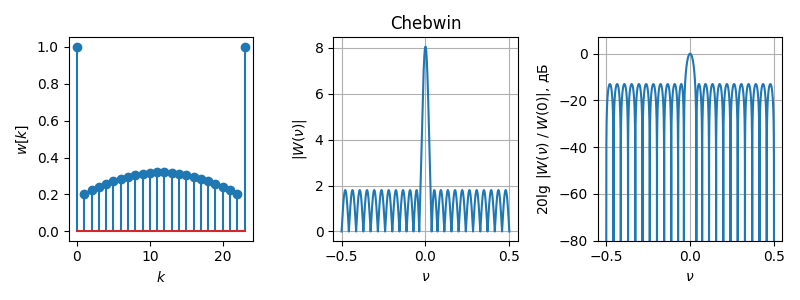

In [13]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

N = 20 + 2 * Nv
#w = signal.get_window('blackman', N)
#w = signal.get_window(('kaiser', beta), N)
# w = signal.get_window(5, N)
w = signal.get_window(('chebwin', 13), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.title("Chebwin")
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-80)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

$$\Delta \nu = 0.023 * 2 = 0.046 Hz$$

Максимальный уровень боковых лепестков: $$-13 dB$$

Скорость спада на боковых лепестках:
$$0 db/октава$$


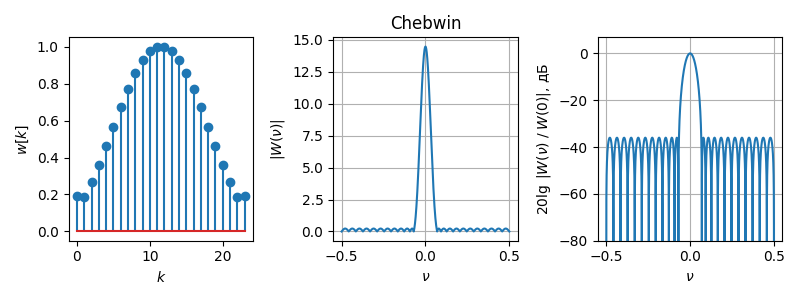

In [14]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

beta = 8.6
N = 20 + 2 * Nv
#w = signal.get_window('blackman', N)
#w = signal.get_window(('kaiser', beta), N)
# w = signal.get_window(5, N)
w = signal.get_window(('chebwin', 36), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.title("Chebwin")
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-80)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

$$\Delta \nu = 0.036 * 2 = 0.072 Hz$$

Максимальный уровень боковых лепестков: $$-36 dB$$

Скорость спада на боковых лепестках:
$$0 db/октава$$


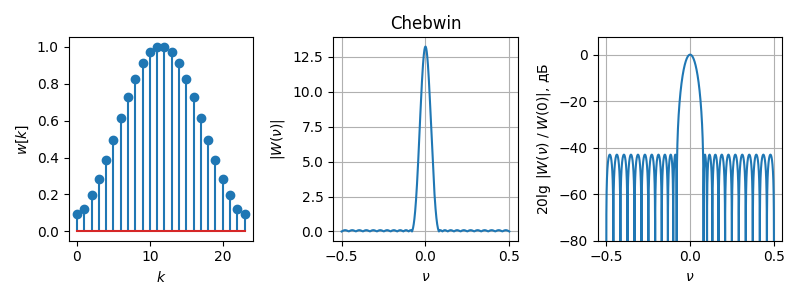

In [15]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

beta = 8.6
N = 20 + 2 * Nv
#w = signal.get_window('blackman', N)
#w = signal.get_window(('kaiser', beta), N)
# w = signal.get_window(5, N)
w = signal.get_window(('chebwin', 43), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.title("Chebwin")
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-80)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

$$\Delta \nu = 0.042 * 2 = 0.084 Hz$$

Максимальный уровень боковых лепестков: $$-43 dB$$

Скорость спада на боковых лепестках:
$$0 db/октава$$


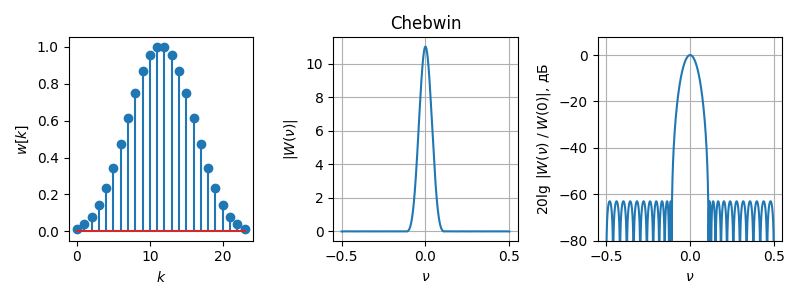

In [16]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

beta = 8.6
N = 20 + 2 * Nv
#w = signal.get_window('blackman', N)
#w = signal.get_window(('kaiser', beta), N)
# w = signal.get_window(5, N)
w = signal.get_window(('chebwin', 63), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.title("Chebwin")
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-80)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

$$\Delta \nu = 0.046 * 2 = 0.091 Hz$$

Максимальный уровень боковых лепестков: $$-63 dB$$

Скорость спада на боковых лепестках:
$$0 db/октава$$


## Задача 2.4. Различимость спектральных компонент.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11 | 15 | 18 | 17 | 32 | 48 | 15 | 18 | 47 | 32 | 40 | 38 |
|$\beta_0$| 1.1| 1.5 | 1.2 | 1.5 | 1.1 | 1.3 | 1.1 | 1.4 | 1.5 | 1.3 | 1.2 | 1.1 |
|$\beta_1$| 5 | 5.5 | 6.2 | 5.7 | 6.1 | 4.9 | 5.1 | 5.7 | 6 | 5.8 | 5.7 | 5.5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности [а может $M = 128??$]
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) окном Кайзера с параметром $\beta=\beta_0.$,

 б) окном Кайзера с параметром $\beta=\beta_1.$
 
 в) окном Блэкмана.
 
Значения параметров $n_0$ и $\beta=\beta_1$ определите из таблицы. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков оконной функции на результат спектрального анализа? 


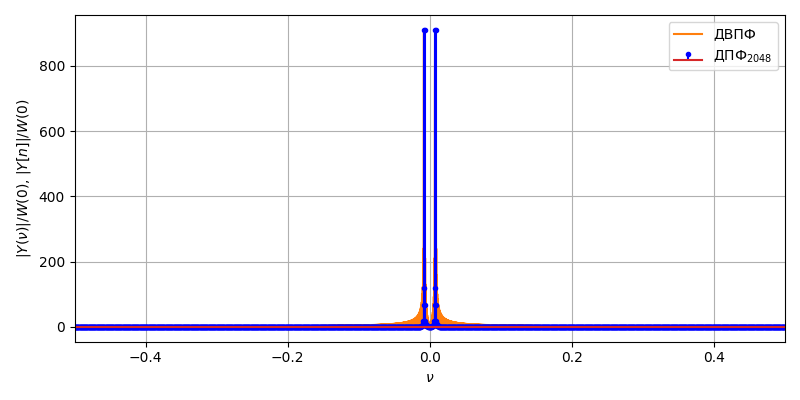

In [35]:
# Kaiser Window

M = 2048
# variant 2
n0 = 15
beta0 = 1.2
beta1 = 5.5

N_dtft = 2**12
N_dft = 2048
k = np.arange(M)
x = np.cos(2 * np.pi * (n0 / M) * k) + np.cos(2 * np.pi * ((n0 + 2) / M) * k)


# w = signal.get_window('boxcar', N)
# w = signal.get_window('blackman', N)
w = signal.get_window(('kaiser', beta0), M)
# w = signal.get_window('flattop', N)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

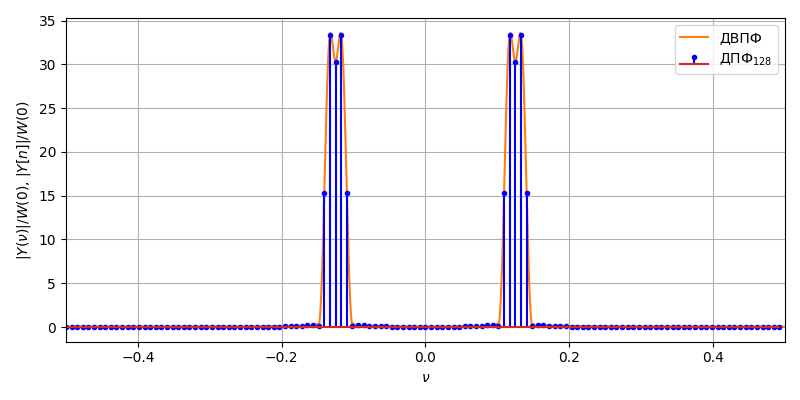

In [33]:
# Kaiser Window

M = 128



N_dtft = 2**12
N_dft = 128
k = np.arange(M)
x = np.cos(2 * np.pi * (n0 / M) * k) + np.cos(2 * np.pi * ((n0 + 2) / M) * k)


# w = signal.get_window('boxcar', N)
# w = signal.get_window('blackman', N)
w = signal.get_window(('kaiser', beta1), 128)
# w = signal.get_window('flattop', N)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

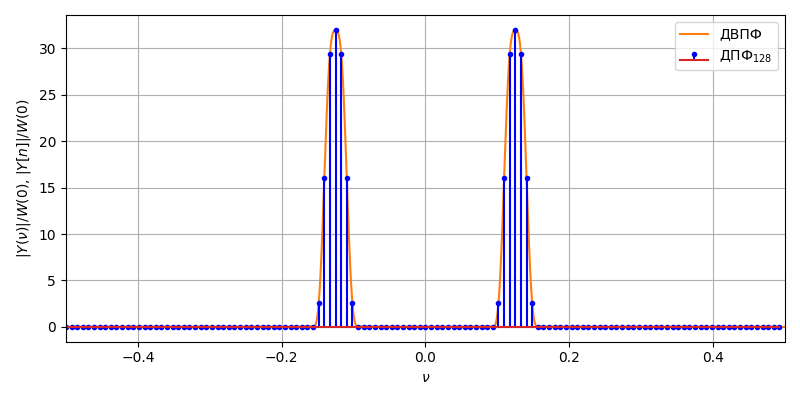

In [34]:
# Blackman Window

M = 128


N_dtft = 2**12
N_dft = 128
k = np.arange(M)
x = np.cos(2 * np.pi * (n0 / M) * k) + np.cos(2 * np.pi * ((n0 + 2) / M) * k)


# w = signal.get_window('boxcar', N)
w = signal.get_window('blackman', M)
# w = signal.get_window(('kaiser', beta1), 128)
# w = signal.get_window('flattop', N)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

## Задача 2.5. Маскировка слабой гармоники боковыми лепестками окна.


| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Бартлетта | Ханна | Хэмминга | Ханна | Бартлетта | Хэмминга |
| $m_2$ |    -2     |     2    |   -2    |     2    |   -2    |     2    |
| $m_3$ |     4     |     6    |    3    |     4    |    5    |     7    |


| Варианты: |       7      |     8     |         9        |      10     |        11       |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Хэмминга | Ханна | Бартлетта | Ханна | Хэмминга | Бартлетта |
| $m_2$ |      2     |   -2    |     2    |   -2    |     2    |   -2    |
| $m_3$ |      7     |    3    |    -3    |   -4    |     5    |    4    |

Сгенерировать последовательность отсчетов гармонического сигнала $x[k]$ длительностью $N=64$, которая может быть описана следующей формулой:
$$x[k]=a_1 \sin\left(2\pi k \frac{n}{N}\right) + a_2 \cos\left(2\pi k \frac{n+m_2}{N}\right) - a_3\sin\left(2\pi k \frac{n+m_3}{N}\right),$$
где $a_1 = n = n_\text{v}+10$ ($n_\text{v}$ — номер вашего варианта), $a_2 = \dfrac{a_1}{6}$, $a_3 = \dfrac{a_1}{2}$, $m_2$  и  $m_3$  значения из таблицы, соответствующие вашему варианту.

* Построить ДВПФ $x[k]$, применив прямоугольное окно. Сколько гармонических компонент можно выделить?

* Построить ДВПФ $x[k]$, применив окно Блэкмана. Какие гармонические компоненты наблюдаются теперь?

* Построить ДВПФ $x[k]$, используя окно $w_1[k]$ из вашего варианта. Получилось ли пронаблюдать все гармонические компоненты?

* Подобрать коэффициенты для окон Чебышева и Кайзера так, чтобы возможно было наблюдать все гармонические компоненты. Построить соответствующие графики.

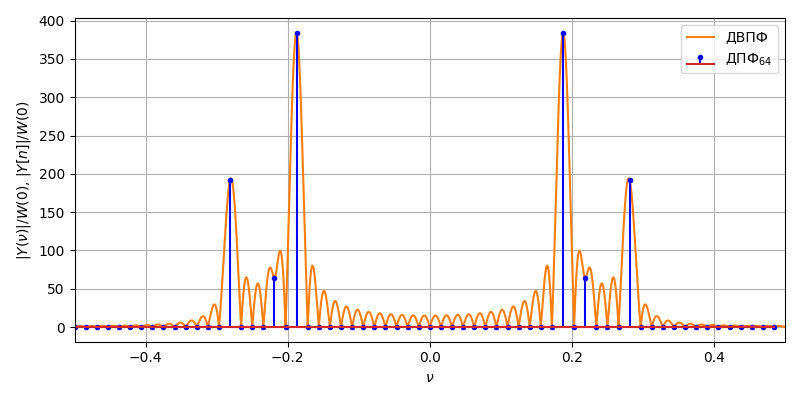

In [37]:
# boxcar Window

M = 64
# variant 2
m2 = 2
m3 = 6
n = 10 + Nv
a1 = 10 + Nv
a2 = a1 / 6
a3 = a1 / 2

N_dtft = 2**12
N_dft = M
k = np.arange(M)
x = a1 * np.sin(2 * np.pi * k * n / M) + a2 * np.cos(2 * np.pi * k * ((n + m2) / M)) - a3 * np.sin(2 * np.pi * k * ((n + m3) / (M)))


w = signal.get_window('boxcar', M)
# w = signal.get_window('hamming', M)
# w = signal.get_window(('kaiser', beta1), 128)
# w = signal.get_window('flattop', N)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

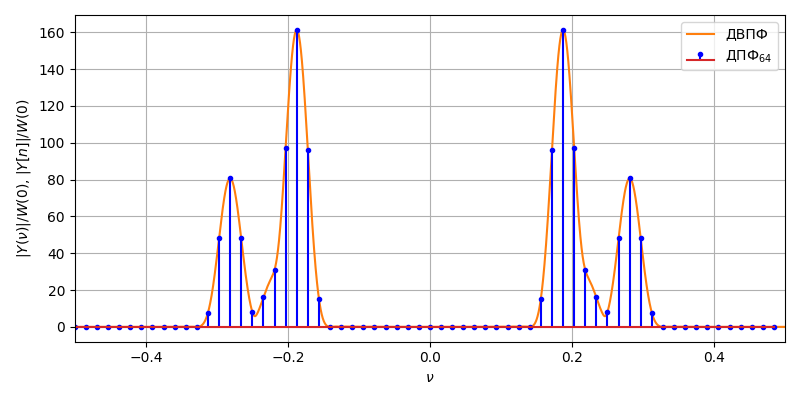

In [38]:
# blackman Window

N_dtft = 2**12
N_dft = M
k = np.arange(M)
x = a1 * np.sin(2 * np.pi * k * n / M) + a2 * np.cos(2 * np.pi * k * ((n + m2) / M)) - a3 * np.sin(2 * np.pi * k * ((n + m3) / (M)))


# w = signal.get_window('boxcar', M)
w = signal.get_window('blackman', M)
# w = signal.get_window(('kaiser', beta1), 128)
# w = signal.get_window('flattop', N)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

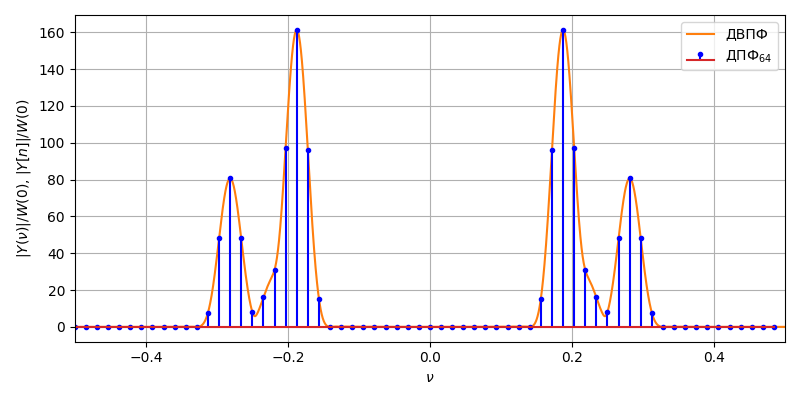

In [39]:
# Kaiser Window


N_dtft = 2**12
N_dft = M
k = np.arange(M)
x = a1 * np.sin(2 * np.pi * k * n / M) + a2 * np.cos(2 * np.pi * k * ((n + m2) / M)) - a3 * np.sin(2 * np.pi * k * ((n + m3) / (M)))


# w = signal.get_window('boxcar', M)
# w = signal.get_window('blackman', M)
# w = signal.get_window(('kaiser', beta1), 128)
# w = signal.get_window('hamming', M)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

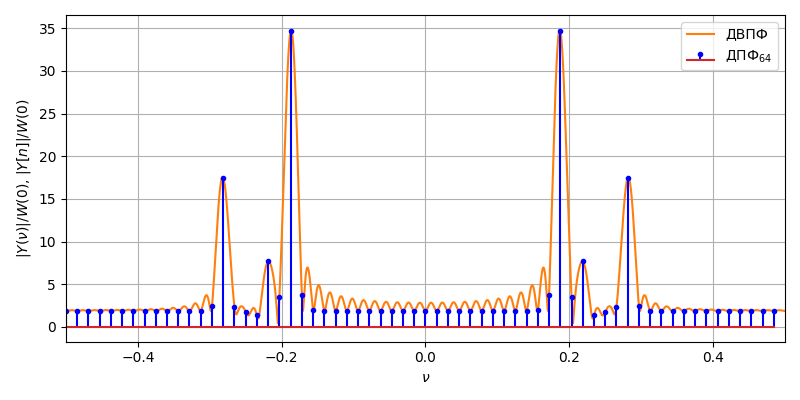

In [40]:
# Hamming Window


N_dtft = 2**12
N_dft = M
k = np.arange(M)
x = a1 * np.sin(2 * np.pi * k * n / M) + a2 * np.cos(2 * np.pi * k * ((n + m2) / M)) - a3 * np.sin(2 * np.pi * k * ((n + m3) / (M)))


# w = signal.get_window('boxcar', M)
# w = signal.get_window('blackman', M)
# w = signal.get_window(('kaiser', beta1), 128)
w = signal.get_window(('chebwin', 12), M)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

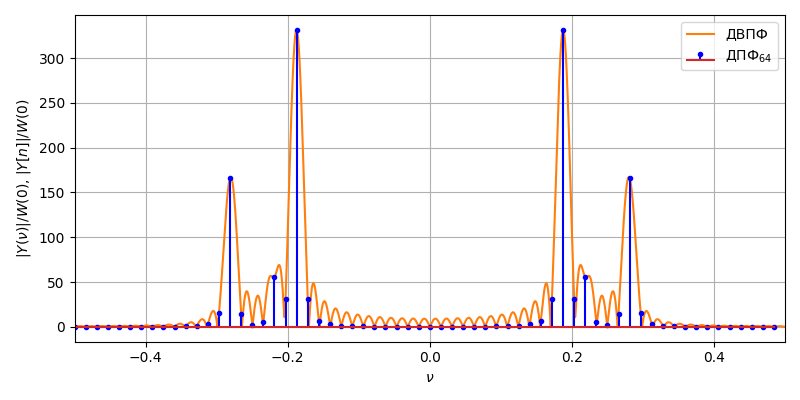

In [41]:
# Kaiser Window


N_dtft = 2**12
N_dft = M
k = np.arange(M)
x = a1 * np.sin(2 * np.pi * k * n / M) + a2 * np.cos(2 * np.pi * k * ((n + m2) / M)) - a3 * np.sin(2 * np.pi * k * ((n + m3) / (M)))


# w = signal.get_window('boxcar', M)
# w = signal.get_window('blackman', M)
w = signal.get_window(('kaiser', 1.5), M)
# w = signal.get_window(('chebwin', 12), M)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

## Задача 2.6. Амплитудная модуляция спектра.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11,5 | 15,5 | 18,5 | 17,5 | 32,5 | 48,5 | 15,5 | 18,5 | 47,5 | 32,5 | 40,5 | 38,5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=128$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) прямоугольным окном (`boxcar`),

 б) окном с плоской вершиной (`flattop`).
 
 
Значение параметра $n_0$ определите из таблицы. Отнормируйте ДПФ на значение АЧХ оконной функции на нулевой частоте ($W(0)=\sum_{k=0}^{N-1} w[k]$). Для двух окон сравните амплитуду гармоники с модулем ближайших к ней отсчетов ДПФ.

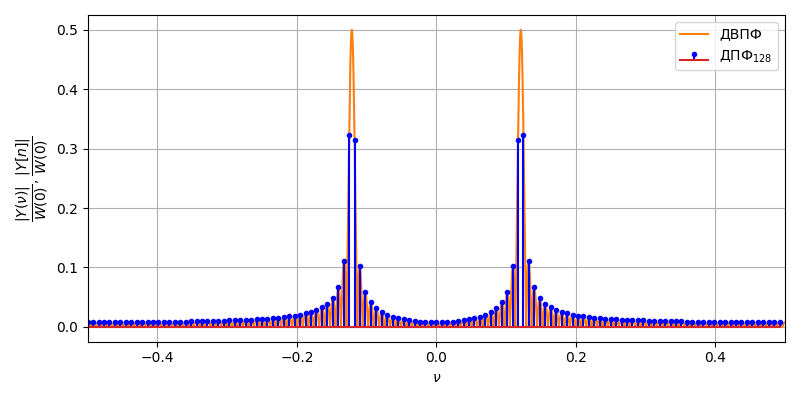

In [42]:
N=128
N_dtft=2**14
N_dft=128
n0 = 15.5
k=np.arange(N)
x=np.cos(2*np.pi*n0/N*k)

w = signal.get_window('boxcar', N)
# w = signal.get_window('blackman', N)
# w = signal.get_window(('kaiser', 8), N)
# w = signal.get_window('flattop', N)
y = x * w
W0 = sum(w)


nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft)/W0, 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft)/W0, linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$\dfrac{|Y(\\nu)|}{W(0)}$, $\dfrac{|Y[n]|}{W(0)}$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

# Занятие 3. Кратковременное дискретное преобразование Фурье (STFT) 

## Задача 3.1. Спектрограмма аудиофайла.  

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'clarinet_minor.wav' | 'clarinet_major32.wav'| 'major_scale_flute1.wav' | 'major_scale_flute2.wav'|'major_scale_flute3.wav' | 'major_scale_flute4.wav'|

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'major_scale_flute5.wav'|'major_scale_piano2.wav'|'major_scale_piano3.wav'|'single_notes.wav'|'violin_natural_minor.wav'|'violin_natural_minor_up.wav'|


Вычислите кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле Вашего варианта. Изобразите спектрограмму сигнала. Длину окна (размер кадра), тип оконной функции, число точек в перекрытии, масштабы осей и размерность ДПФ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равен размер кадра в секундах и как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте у данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,

* б) длина окна,

* в) размерность ДПФ (за счет дополнения нулевыми отсчетами)?


fs =  48000


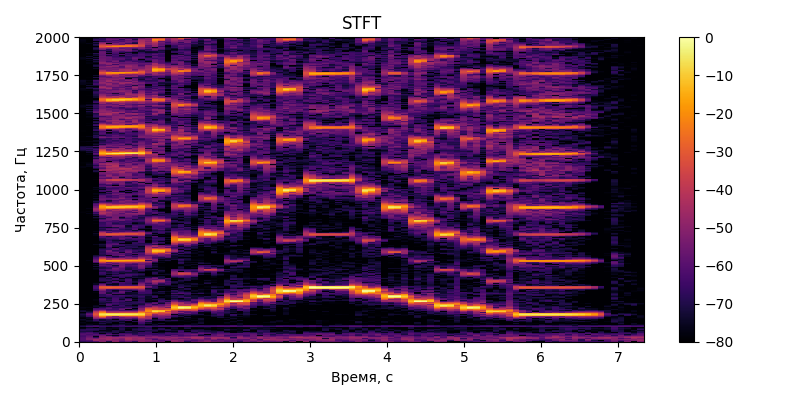

In [45]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile
# from IPython.display import Audio

fs, x = scipy.io.wavfile.read('dataset_lab3_/clarinet_major32.wav')
# if x.shape[1]>1:
#     x=x[:, 0] # берем левый канал в случае, если wav-файл — стереозапись 

plt.figure(figsize=[8, 4], dpi=100)
f, t, Zxx = signal.stft(x, fs=fs, window=('hann'), nperseg=8192, noverlap=4096, nfft=2**13)
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-80, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.ylim((0, 2000))
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()
print("fs = ", fs)

1) Есть несколько групп частот(нот), которые повышаются к середине файла и падают к концу
2) Размер кадра:
$\tau = 4096 * (1 / fs) = 0.085 sec$
$N = 4096$
Именно такую ширину по времени имеют прямоугольники(именно столько отчетов в каждом прямоугольнике)
3) Разрешение по времени:
$\delta t = 0,085 sec$
Разрешение по частоте:
$\delta f = fs / N = 5,85 Hz$

## Задача 3.2. Спектрограмма ЛЧМ сигнала. 

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$f_0$, Гц | 170| 80 | 90 | 75 | 120 | 130 | 85 | 95 | 70 | 65 | 110 | 105 |
|$f_1$, Гц | 800 | 900 | 850 | 870 | 820 | 875 | 780 | 810 | 790 | 825 | 830 | 840 |

Постройте спектрограмму c окном Блэкмана для ЛЧМ-сигнала длительностью $T=2$ секундам, мгновенная частота которого изменяется от $f_0$ до $f_1$, частота дискретизации $f_s=2000$ Гц. Начальный размер кадра (`nperseg`) выберите $H=512$ отсчетов. Пронаблюдайте, как изменяется спектрограмма при изменении следующих параметров:
* тип оконной функции (`window`),
* длина кадра (`nperseg`),
* размерность ДПФ (`nfft`).

1) При изменении оконной функции меняется спектрограмма в зависимости от того, какое окно мы взяли
2) Меняется интервал времени, по которому построена спектрограмма
3) Меняется точность, разрешение по спектру

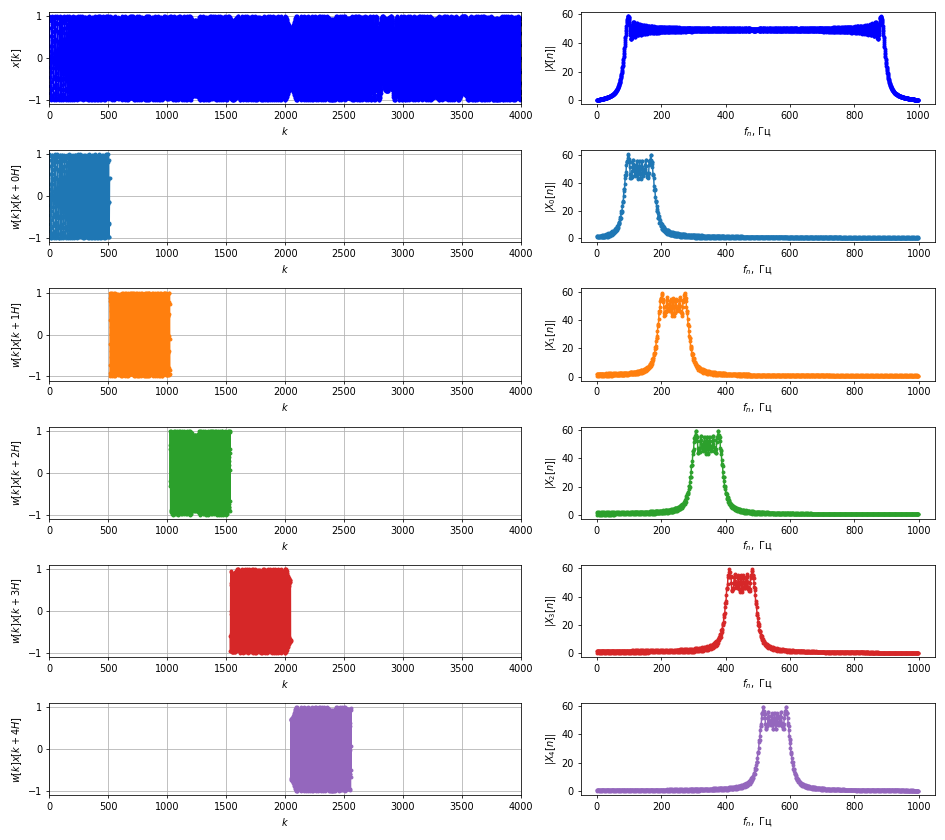

In [51]:
fs=2000
f0=80
f1=900
t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

plt.figure(figsize=[13.5, 12], dpi=70)
nseg=5
nperseg=512
noverlap=0
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b')
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b')
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 2048)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

# Примеры вычислений на Python для лабораторной работы №3

## Обработка wav-файла 

Чтение звукового wav-файла можно провести с помощью функции `scipy.io.wavfile.read`. На вход она принимает первым параметром (и единственным обязательным) адрес файла, который требуется декодировать. Функция возвращает частоту дискретизации в Гц (`fs`) и (`x`) - массив отсчетов. В случае монозаписи (одноканальной) массив `x` одномерный, а у случае стереозаписи (двуканальной) —  двумерный, где номера строк соответствуют разным каналам записи, а номера столбцов – индексам отсчетов. 

Цифровой сигнал является одновременно и дискретизованным по времени, и квантованным по уровню. Поэтому каждый отсчет кодируется заданным числом бит, определяемым типом данных для элементов массива `x`. Например, для `int16` один отсчет занимает 16 бит (16 двоичных разрядов), а число уровней квантования $2^{16}$. 

In [ ]:
import scipy.io.wavfile
import numpy as np
fs, x = scipy.io.wavfile.read('cello4.wav')
print("Частота дискретизации %.0f Гц" %fs)
print("Тип данных", x.dtype)
print("Размер массива", x.shape)
print("Число отсчетов записи", x.shape[0])

Воспроизведем звукозапись. 

In [ ]:
from IPython.display import Audio
Audio('./cello4.wav')

Если запись двуканальная, возьмем в рассмотрение только один канал.

In [ ]:
if len(x.shape)==2:
    x=x[:, 0]

Построим график сигнала во временной области. Для выделения фрагмента можно использовать функцию `plt.xlim` или инструменты zoom и pan (при backend notebook). Для использования zoom нужно выделить прямоугольником область графика, которую требуется рассмотреть. Для использования pan при нажатой левой кнопке мыши график можно перемещать, а нажатой правой кнопке мыши — изменять масштаб по осям. 
* `np.arange(x.size)/fs` — массив отсчетов во времени $k\Delta t = k/f_д$, $k=0,\;1,\; \dots, N-1$, $N$ — число отсчетов сигнала.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 4]) # размер полотна
plt.plot(np.arange(x.size)/fs, x, '.') # график сигнала (точками)
plt.grid() # сетка 
plt.xlim([1, 1.07]) # Выделение фраграмента от 1 с до 1,07 с
plt.title("Cигнал $x[k]$") # заголовок графика
plt.xlabel("$t$, c") # подпись оси абсцисс
plt.ylabel("$x(k\Delta t)$") # подпись оси ординат
plt.tight_layout()
plt.show()

Оценим спектр исходного сигнала с помощью ДВПФ для выборок сигнала $\Delta t x(k\Delta t)$ (`x/fs`). Связь между спектрами аналогового сигнала и цифрового в данном случае:
$$X_д (f) =  \sum_{m=-\infty}^{\infty} X_а(f+m f_д )$$

* Если пренебречь эффектом наложения спектров, то на интервале $[-f_д/2; \; f_д/2]$ выполняется $X_а (f) \approx X_д(f) $. 

* Тогда можно построить оценку спектра $$\hat{X}_а (f) = X_д(f)\;\; при \;\; f\in[-f_д/2; \; f_д/2].$$ Вычислим ее в `Nfft` точках, равномерно расположенных на полуинтервале  $[-f_д/2; \; f_д/2)$.

* Поскольку правый конец полуинтервала (точка $f_д/2$) не включается, при задании частот нужно указать `endpoint=False`. 

* ДВПФ в этих точках вычислим с помощью ДПФ (`scipy.fft.fft` или `np.fft.fft`). 

* Чтобы перенести отсчеты ДПФ c полуинтервала $[0, f_д)$ на полуинтервал $[-f_д/2; \; f_д/2)$  используем функцию `scipy.fft.fftshift` или `np.fft.fftshift`.

* Определим размерность ДПФ `Nfft` как наибольшее из двух: $2^{19}$ и результата работы функции `scipy.fft.next_fast_len` для длины последовательности. Функция `scipy.fft.next_fast_len` определить следующую размерность ДПФ, для которой вычисления по алгоритму быстрого преобразования Фурье проходят эффективно. 

In [ ]:
import scipy.fft
Nfft=max(scipy.fft.next_fast_len(x.size), 2**19) 
f, Xf = np.linspace(-0.5*fs, 0.5*fs, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(x/fs, Nfft))

In [ ]:
print("Размерность ДПФ", Nfft) 

In [ ]:
plt.figure(figsize=[8, 4])
plt.title("Оценка спектра звукового сигнала")
plt.plot(f, abs(Xf), '-')
plt.xlim([0, 1000])
plt.grid()
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|\hat{X}_a(f)|$")
plt.tight_layout()
plt.show()

Пример анализа графика: во временной области мы можем наблюдать повторение через  

In [ ]:
print("%.3f c" % (1.00214-0.98680))

Такому периоду соотвествует частота 

In [ ]:
print("%.3f Гц" % (1/(1.00214-0.98680)))

Примерно на этой частоте мы наблюдаем первую гармонику в спектре сигнала. 

## Распознавание сигнала с помощью ДПФ

Определим ДПФ сигнала из $N=64$ точек 
$$x[k] = \sin \left(2\pi  \dfrac{12}{N} k\right) + 2 \sin \left(2\pi  \dfrac{18}{N} k +\dfrac{\pi}{3}\right)$$

In [ ]:
N=64
k=np.arange(N)
x=np.sin(2*np.pi*k*12/N)+2*np.sin(2*np.pi*k*18/N+np.pi/3)

В теоретической части работы рассматривался пример задачи спектрального анализа по обнаружению и оцениванию параметров сигнала. Пусть обрабатываемая последовательность имеет вид
$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$
где ${{A}_{m}}$ и ${{\varphi }_{m}}$ – неизвестные заранее амплитуды и фазы гармонических составляющих; $m$– неизвестные заранее целые числа, определяющие нормированные частоты ${{\nu }_{m}}=m/N$ гармонических составляющих, которые совпадают с бинами ДПФ. Для определения ${{A}_{m}}$ и ${{\varphi }_{m}}$ в этом случае достаточно вычислить ДПФ последовательности: 
	$$\tilde{X}[n]=\frac{1}{N}\sum\limits_{k=0}^{N-1}{x[k]}{{e}^{-j\frac{2\pi }{N}nk}}.$$
Неизвестные амплитуды и фазы определяются как
${{A}_{m}}=2\left| \tilde{X}[m] \right|;\quad {{\varphi }_{m}}=\arg \tilde{X}[m]+\pi /2,\ \ m\in \left[ 0,\ \frac{N}{2}-1 \right]$


Для расчетов удобно сразу взять формулу ДПФ с нормировкой на число отсчетов:

In [ ]:
Xn=np.fft.fft(x)/N

In [ ]:
plt.figure(figsize=[8, 4])
plt.title("ДПФ$_{%i}$ сигнала $x[k]$" %N)
plt.stem(np.arange(Xn.size), abs(Xn))
plt.ylabel("$\\tilde{X}[n]$")
plt.xlabel("$n$")
plt.tight_layout()
plt.grid()
plt.show()

На левой половине периода ненулевыми являются отсчеты ДПФ $n=12$ и $n=18$.

$$x[k]=A_{12} \sin \left(2\pi \dfrac{12}{64}k+{{\varphi }_{12}} \right) + A_{18} \sin \left(2\pi \dfrac{18}{64}k+{{\varphi }_{18}} \right),\quad k=0,\ 1,\ 2,\ \ldots ,\ 63.$$

Остается опредлить неизвестные амплитуды и фазы $A_{12}$, $A_{18}$, ${\varphi }_{12}$, ${\varphi }_{18}$. 

$A_{12}$

In [ ]:
2*abs(Xn[12])

$A_{18}$

In [ ]:
2*abs(Xn[18])

${\varphi }_{12}$

In [ ]:
phi_12 = np.angle(Xn[12])+(np.pi/2)
phi_12

${\varphi }_{18}$

In [ ]:
phi_18 = np.angle(Xn[18])+(np.pi/2)
phi_18

${\varphi }_{18}$ сооставляет $1/3$ от $\pi$.

In [ ]:
phi_18/np.pi

Оценка сигнала

$$x[k] = \sin \left(2\pi  \dfrac{12}{N} k\right) + 2 \sin \left(2\pi  \dfrac{18}{N} k +\dfrac{\pi}{3}\right)$$

## Оконные функции

`scipy.signal.get_window(window, Nx, fftbins=True)` Возвращает отсчеты оконной функции заданного типа и длины. 

**Parameters:**

`window` *string, float, or tuple* Тип оконной функции. 
* ***string***  Если окно непараметрическое (например, `boxcar`, `blackman`, `hamming`, `hann`, `bartlett`, `flattop`), то `window` — название окна (строка).

Название окна | Прямоугольное| Блэкмана|Хемминга| Ханна| Бартлета | С плоской вершиной
:----:  | :----:  | :----:    | :----:  | :----:| :----:    |  :----:   
***string*** | `boxcar`| `blackman`|`hamming`| `hann`| `bartlett`| `flattop`


* ***tuple*** Если окно параметрическое, то окно задается кортежем, где нулевой элемент — название окна (строка), а последующие элементы - параметры окна. Например, `('chebwin', 13)` — окно Чебышёва с уровнем боковых лепестков 13 дБ относительно главного, `('kaiser', 5)` — окно Кайзера с параметром $\beta=5$. 
Название окна | Кайзера| Чебышёва |
:----:  | :----:  | :----:    |
 ***tuple*** | `(kaiser, beta)` | `(chebwin, attenuation)`|
* ***float***  Для случая окна Кайзера можно сразу указать значение $\beta$ в параметр `window`.  Запись `window = 5` эквивалентна `window = ('kaiser', 5)`






`Nx` *int* Длина окна. 

`fftbins` *bool, optional* Если параметр равен `True` (по умолчанию), то создается окно для ДПФ, если `False` — симметричное на интервале $[0, N_x-1]$ окно, используемое для синтеза КИХ-фильтров.


**Returns:**

`get_window` *ndarray* Одномерный массив отсчетов окна длины `Nx`.

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

N = 16
w = signal.get_window('boxcar', N)
# w = signal.get_window(('kaiser', 5), N)
# w = signal.get_window(5, N)
# w = signal.get_window(('chebwin', 13), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-60)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

## Взвешивание сигнала оконной функцией

### Пример 1. Различимость спектральных компонент.

Рассмотрим 64-точечный сигнал ($k=0,\;1,\;\dots, 63$)
$$x[k]=\sin\left( 2 \pi k \dfrac{11}{64}\right)+\sin\left( 2 \pi k \dfrac{13}{64}\right).$$
* Пример ниже показывает, что в случае прямоугольного окна (`w = signal.get_window('boxcar', N)`) спектральные компоненты вблизи частот $\nu_1={11}/{64}$ и  $\nu_2={13}/{64}$ различимы в ДВПФ. 
* Если выбрать окно Блэкмана(`w = signal.get_window('blackman', N)`) или окно Кайзера с параметром $\beta=8$ (`w = signal.get_window(('kaiser', 8), N)`), то эти спектральные компоненты неразличимы в ДВПФ.
* Если спектральные компоненты неразличимы в ДВПФ, то невозможно подобрать такую размерность ДПФ (`N_dft`), чтобы они оказались различимы в ДПФ. В противном случае это возможно. 

In [ ]:
N=64
N_dtft=2**14
N_dft=64
k=np.arange(N)
x=np.sin(2*np.pi*k*11/N)+np.sin(2*np.pi*k*13/N)

w = signal.get_window('boxcar', N)
# w = signal.get_window('blackman', N)
# w = signal.get_window(('kaiser', 8), N)
# w = signal.get_window('flattop', N)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

### Пример 2. Амплитудная модуляция спектра.
Рассмотрим 32-точечный сигнал ($k=0,\;1,\;\dots, 31$)
$$x[k]=\cos\left( 2 \pi k \dfrac{9.5}{32}\right)=\frac{1}{2}\exp\left({j2 \pi k \dfrac{9.5}{32}}\right)+\frac{1}{2}\exp\left({-j2 \pi k \dfrac{9.5}{32}}\right)$$
* Пусть $y[k]=x[k]w[k]$, где $w[k]$ — некоторое окно. ДВПФ сигнала $y[k]$ 
$$Y(\nu)=\dfrac{1}{2} W\left(\nu- \dfrac{9.5}{32} \right)+\dfrac{1}{2} W\left(\nu+ \dfrac{9.5}{32} \right).$$
Чтобы высоты максимумов на графике ДВПФ соответствовали амплитудам гармоник, нужно нормировать ось ординат на $W(0)$.
* Если выбрать прямоугольное окно, `w = signal.get_window('boxcar', N)`, то оценки амплитуд, получаемые с помощью ДПФ$_{32}$, ,будут отличаться от истинных значений на $-3,92$ дБ (значение коэффициента паразитной амплитудной модуляции). 
* Результат можно исправить, дополняя сигнал нулевыми отсчетами и увеличивая размерность ДПФ. 
* Без изменения размерности ДПФ лучшего результата можно добиться с помощью окна с плоской вершиной `w = signal.get_window('flattop', N)`.
* В реальности часто частоты гармоник неизвестны. Поэтому для оценки амплитуд используются окна с низким коэффициентом паразитной амплитудной модуляции (например, flattop-окно).

In [ ]:
N=64
N_dtft=2**14
N=32
N_dft=32
k=np.arange(N)
x=np.cos(2*np.pi*9.5/N*k)

# w = signal.get_window('boxcar', N)
# w = signal.get_window('blackman', N)
# w = signal.get_window(('kaiser', 8), N)
w = signal.get_window('flattop', N)
y = x * w
W0 = sum(w)


nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft)/W0, 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft)/W0, linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$\dfrac{|Y(\\nu)|}{W(0)}$, $\dfrac{|Y[n]|}{W(0)}$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

## Кратковременное дискретное преобразование Фурье (STFT)

Кратковременное дискретное преобразование Фурье (Discrete  STFT, англ. Discrete Short-time Fourier transform) можно задать формулой
$${{X}_{m}}[n]=\sum\limits_{k=mR}^{mR+M-1}{x}[k]w[k-mR]\exp \left( -j2\pi \frac{nk}{{{N}_{\text{FFT}}}} \right),$$
где 
* $w[k]$ — временное окно, 
* $m$ — порядковый номер сегмента, 
* $M$ — длина окна (сегмента), 
* ${{N}_{\text{FFT}}}$ – размерность ДПФ, 
* $R=M-L$ – единичный сдвиг окна, 
* $L$ — размер перекрытия. 

Это преобразование позволяет осуществлять ДПФ-анализ на коротких интервалах времени. Для графического отображения результатов данного преобразования часто используется представление в виде графика с двумя осями, где по горизонтальной оси отображается время (или номер кадра $m$), по вертикальной — соответствующие частоты, а цветом отображается $|{{X}_{m}}[n]|$, $|{{X}_{m}}[n]{{|}^{2}}$ (в случае спектрограммы), или фазовая часть ${{X}_{m}}[n]$.


### Функция scipy.signal.stft

`scipy.signal.stft(x, fs=1.0, window='hann', nperseg=256, noverlap=None, nfft=None, detrend=False, return_onesided=True, boundary='zeros', padded=True, axis=-1, scaling='spectrum')` Расчет кратковременного дискретного преобразования Фурье (STFT)

**Основные параметры:**

`x` *array_like* Отсчеты сигнала. 

`fs` *float, optional* Частота дискретизации. 

`window` *str or tuple or array_like, optional* Используемое окно. Задается в виде параметров для функции `get_window` (без указания длины) или в виде массива отсчетов окна. По умолчанию генерируется окно Ханна. 

`nperseg` *int, optional* Длина сегмента $M$ (длина окна). По умолчанию 256.

`noverlap` *int, optional* Число точек в перекрытии $L$. По умолчанию, используется 50% перекрытие. 

`nfft` *int, optional* Размерность ДПФ сегментов.

Описание параметров `detrend`, `return_onesided`, `boundary`, `padded` , `axis`, `scaling: {‘spectrum’, ‘psd’}` можно найти в API reference SciPy. 

**Returns:**
`f` *ndarray* Массив частот спектрограммы.

`t` *ndarray* Массив времен спектрограммы.

`Zxx` *ndarray* Значения STFT.

### Пример построения спектрограммы

In [ ]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile
from IPython.display import Audio

fs, x = scipy.io.wavfile.read('vibraphone-loop-1.wav')
if x.shape[1]>1:
    x=x[:, 0] # берем левый канал в случае, если wav-файл — стереозапись 
Audio('./vibraphone-loop-1.wav')



In [ ]:
plt.figure(figsize=[8, 4], dpi=100)
f, t, Zxx = signal.stft(x, fs=fs, window=('hann'), nperseg=4000, noverlap=2000, nfft=2**12)
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-80, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.ylim((0, 2000))
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()

Разрешение по времени для STFT равно длине единичного сдвига окна в секундах, т.е. $R/{{f}_{\text{s}}}$. 

Разрешение по частоте обусловлено двумя параметрами.

* Сеткой частот ДПФ $\Delta f={{f}_{\text{s}}}/{{N}_{\text{FFT}}}$, где ${{N}_{\text{FFT}}}$— размерность ДПФ. Это разрешение можно улучшить без изменения длины кадра — путем добавления нулевых отсчетов. 

* Шириной главного лепестка оконной функции. Как правило, этот параметр зависит от длины окна $M.$


###  Проверка условий COLA(R) и NOLA(R)

По опредлению, окно $w[k]$ обладает свойством COLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]=const \ \forall k\in \mathbf{Z}$.

In [ ]:
from scipy import signal
signal.check_COLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=2000)

По опредлению, окно $w[k]$ обладает свойством NOLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]^2 \neq 0\ \forall k\in \mathbf{Z}$.

In [ ]:
signal.check_NOLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=2000)

### Вычисление обратного преобразования

Вычисление обратного преобразования можно провести с помощью функции `scipy.signal.istft`.

In [ ]:
t1, x1 =  signal.istft(Zxx, fs=fs, window=('hann'), nperseg=4000, noverlap=2000, nfft=2**12)
x1

### Пример. Формирование спектрограммы  ЛЧМ - сигнала

Рассмотрим сигнал, частота которого изменяется по линейному закону:

$$f(t) = f_0 + (f_1 - f_0) t / t_1$$

In [ ]:
fs=500
f0=1
f1=80
t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

Формирование спектрограммы  ЛЧМ - сигнала без перекрытия сегментов. 

In [ ]:
plt.figure(figsize=[13.5, 12], dpi=70)
nseg=5
nperseg=200
noverlap=0
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b')
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b')
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

In [ ]:
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=200, noverlap=0, nfft=200)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()
plt.show()

Формирование спектрограммы  ЛЧМ - сигнала с перекрытием сегментов 50%. 

In [ ]:
plt.figure(figsize=[8, 10], dpi=120)
fs=500
f0=1
f1=80
t=np.arange(0, 2.4, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

nseg=5
nperseg=400
noverlap=200
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])
linewidth=0.5
ms=2
plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b', linewidth=0.5, ms=ms)
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b', linewidth=linewidth, ms=ms)
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u, linewidth=linewidth, ms=ms)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u, linewidth=linewidth, ms=ms)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

In [ ]:
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=400, noverlap=200, nfft=400)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()

### Пример. Влияние выбора окна. 

In [ ]:
import scipy.io.wavfile
fs, x = scipy.io.wavfile.read('vibraphone-scale.wav')
x=x[:, 0]
N_dtft=2**18

windows=['boxcar', 'hamming', 'blackman']
gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for window in windows: #'bartlett', 'hann', 
    plt.subplot(gs[u*2], title='window   =   %s' % (window))
    nperseg=4000
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    f, W = np.linspace(-fs/2, fs/2, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, N_dtft))
    with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
        plt.plot(f, 20*np.log10(abs(W)/max(abs(W))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/nperseg, 7*fs/nperseg])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    plt.tight_layout()
    u+=1   

In [ ]:
import scipy.io.wavfile
fs, x = scipy.io.wavfile.read('vibraphone-scale.wav')
x=x[:, 0]
N_dtft=2**18

window='hann'

gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for nperseg in [2000, 4000, 10000]: 
    plt.subplot(gs[u*2], title='Длина окна  $M=%s$' % (nperseg))
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    f, W = np.linspace(-fs/2, fs/2, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, N_dtft))
    with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
        plt.plot(f, 20*np.log10(abs(W)/max(abs(W))))
    plt.ylim(ymin=-120)
    plt.xlim([-200, 200])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    plt.tight_layout()
    u+=1   